In [1]:
#upload Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import tarfile
from PIL import Image
import matplotlib.pyplot as plt
import io

import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import os
from tqdm import tqdm

In [4]:
#check what files are in the part1.tar file, first 20 items
!tar -tvf /content/drive/MyDrive/w210/Purdue_AI_Images/part1.tar | head -n 20

drwxr-xr-x ll45/domain users 0 2024-05-29 17:29 part1/
drwxr-xr-x ll45/domain users 0 2024-02-20 17:06 part1/casia-webface/
drwxr-xr-x ll45/domain users 0 2024-03-04 06:24 part1/casia-webface/009265/
-rw-r--r-- ll45/domain users 5085 2022-06-08 10:51 part1/casia-webface/009265/00451732.jpg
-rw-r--r-- ll45/domain users 4420 2022-06-08 10:51 part1/casia-webface/009265/00451700.jpg
-rw-r--r-- ll45/domain users 7172 2022-06-08 10:51 part1/casia-webface/009265/00451721.jpg
-rw-r--r-- ll45/domain users 4752 2022-06-08 10:51 part1/casia-webface/009265/00451726.jpg
-rw-r--r-- ll45/domain users 3776 2022-06-08 10:51 part1/casia-webface/009265/00451718.jpg
-rw-r--r-- ll45/domain users 5391 2022-06-08 10:51 part1/casia-webface/009265/00451710.jpg
-rw-r--r-- ll45/domain users 5213 2022-06-08 10:51 part1/casia-webface/009265/00451709.jpg
-rw-r--r-- ll45/domain users 5384 2022-06-08 10:51 part1/casia-webface/009265/00451723.jpg
-rw-r--r-- ll45/domain users 6404 2022-06-08 10:51 part1/casia-webface/0

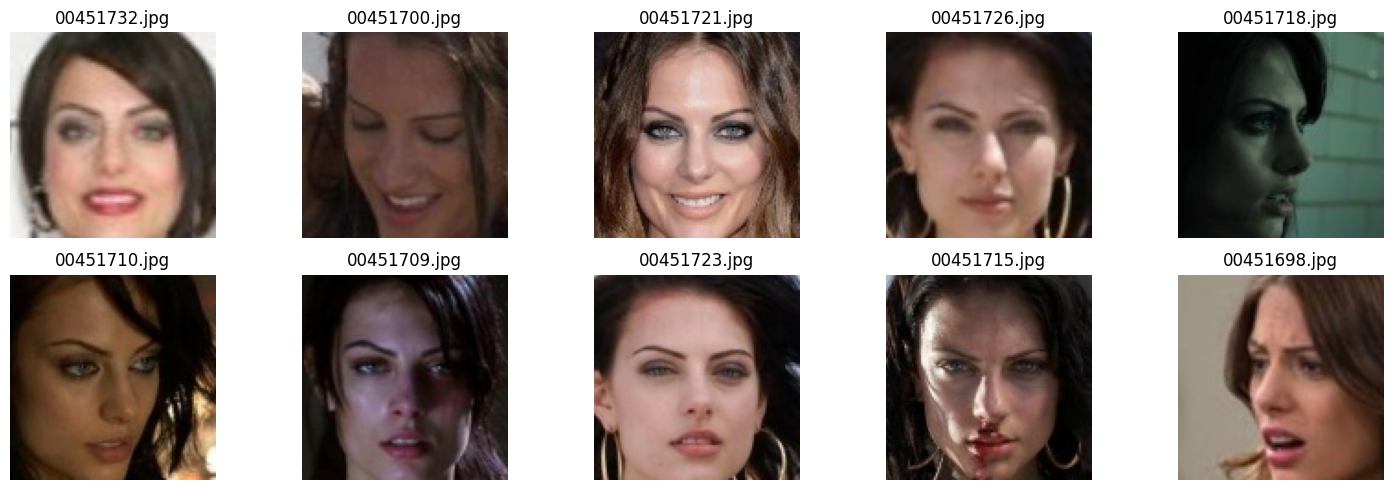

In [5]:
#print example images from the tar file
tar_path = '/content/drive/MyDrive/w210/Purdue_AI_Images/part1.tar'

with tarfile.open(tar_path, 'r') as tar:
    count = 0
    plt.figure(figsize=(15, 5))

    for member in tar:
        if member.isfile() and member.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file = tar.extractfile(member)
            if file:
                image = Image.open(io.BytesIO(file.read()))
                plt.subplot(2, 5, count + 1)
                plt.imshow(image)
                plt.axis('off')
                plt.title(member.name.split('/')[-1])
                count += 1
            if count == 10:
                break

    plt.tight_layout()
    plt.show()


In [6]:
#print the content of the annotations for the tar file
# Define file paths
test_csv_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/test.csv"
train_csv_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/train.csv"

# Load CSV files
test_df = pd.read_csv(test_csv_path)
train_df = pd.read_csv(train_csv_path)

# Display first few rows
print("Test CSV:")
display(test_df.head())

print("Train CSV:")
display(train_df.head())


Test CSV:


,Image Path,Uncertainty Score Gender,Uncertainty Score Age,Uncertainty Score Race,Ground Truth Gender,Ground Truth Age,Ground Truth Race,Intersection,Target
0,/dfdc/real/0_6063_61.png,0.563333,0.300805,0.639904,0,0,1,5,0
1,/ff++/crop_img/0_FaceSwap_281_474_191.png,0.200133,0.200117,0.206625,0,0,1,5,1
2,/dfdc/fake/0_4923_251.png,0.241773,0.491410,0.227995,0,3,1,5,1
3,/dfdc/real/0_6614_121.png,0.464822,0.590958,0.625341,0,0,1,5,0
4,/dfdc/real/0_4849_61.png,0.457190,0.634230,0.631627,0,0,1,5,0


Train CSV:


,Image Path,Uncertainty Score Gender,Uncertainty Score Age,Uncertainty Score Race,Ground Truth Gender,Ground Truth Age,Ground Truth Race,Intersection,Target
0,/casia-webface/007489/00388746.jpg,0.208536,0.204873,0.222412,1,0,1,1,0
1,/CelebA/167828.jpg,0.200792,0.200282,0.262147,0,0,1,5,0
2,/dfd/real/0_27__walking_and_outside_surprised_...,0.202415,0.201317,0.223403,0,0,1,5,0
3,/casia-webface/005261/00292320.jpg,0.206360,0.223114,0.210932,1,0,1,1,0
4,/CelebA/137388.jpg,0.200244,0.206097,0.201885,1,0,1,1,0


In [7]:
#check column names and basic info
print("Test CSV Info:")
test_df.info()

print("\nTrain CSV Info:")
train_df.info()


Test CSV Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422352 entries, 0 to 422351
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Image Path                422352 non-null  object 
 1   Uncertainty Score Gender  422352 non-null  float64
 2   Uncertainty Score Age     422352 non-null  float64
 3   Uncertainty Score Race    422352 non-null  float64
 4   Ground Truth Gender       422352 non-null  int64  
 5   Ground Truth Age          422352 non-null  int64  
 6   Ground Truth Race         422352 non-null  int64  
 7   Intersection              422352 non-null  int64  
 8   Target                    422352 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.0+ MB

Train CSV Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689404 entries, 0 to 1689403
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  -----

In [8]:
#check for missing values
print("Missing values in Test CSV:")
print(test_df.isnull().sum())

print("\nMissing values in Train CSV:")
print(train_df.isnull().sum())

Missing values in Test CSV:
Image Path                  0
Uncertainty Score Gender    0
Uncertainty Score Age       0
Uncertainty Score Race      0
Ground Truth Gender         0
Ground Truth Age            0
Ground Truth Race           0
Intersection                0
Target                      0
dtype: int64

Missing values in Train CSV:
Image Path                  0
Uncertainty Score Gender    0
Uncertainty Score Age       0
Uncertainty Score Race      0
Ground Truth Gender         0
Ground Truth Age            0
Ground Truth Race           0
Intersection                0
Target                      0
dtype: int64


In [9]:
# Load CSVs
test_df = pd.read_csv(test_csv_path)
train_df = pd.read_csv(train_csv_path)

# Combine train and test CSVs
combined_df = pd.concat([test_df, train_df], ignore_index=True)

# Shuffle the combined DataFrame
combined_df = shuffle(combined_df, random_state=42).reset_index(drop=True)

def preprocess_and_balance(df, total_target_samples):
    # Step 1: Rename columns
    df = df.rename(columns={
        "Ground Truth Gender": "gender",
        "Ground Truth Race": "ethnicity",
        "Ground Truth Age": "age",
        "Target": "label"
    })

    # Step 2: Encode ethnicity (1 = White, 0 = Other)
    df["ethnicity"] = df["ethnicity"].apply(lambda x: 1 if x == 1 else 0)

    # Step 3: Balance dataset by label
    min_count = df['label'].value_counts().min()
    balanced_by_label_df = df.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

    removed_rows = len(df) - len(balanced_by_label_df)
    print(f"Rows removed due to balancing by label: {removed_rows}")

    # Step 4: Split image_filename into image_id and image_path
    balanced_by_label_df["image_id"] = balanced_by_label_df["Image Path"].apply(lambda x: os.path.basename(x))
    balanced_by_label_df["image_path"] = balanced_by_label_df["Image Path"]

    # Step 5: Keep only needed columns
    balanced_by_label_df = balanced_by_label_df[["image_id", "image_path", "gender", "ethnicity", "age", "label"]]

    # Step 6: Balance across gender & ethnicity
    grouped = balanced_by_label_df.groupby(["gender", "ethnicity"])
    n_groups = grouped.ngroups
    samples_per_group = int(total_target_samples // n_groups)

    balanced_df = grouped.apply(
        lambda x: x.sample(min(len(x), samples_per_group), random_state=42)
    ).reset_index(drop=True)

    # Step 7: Shuffle final dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_df

total_images = 80000

# Preprocess & balance the combined dataset
purdue_df = preprocess_and_balance(combined_df, total_images)

# Save the processed/balanced version
combined_out_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/purdue_balanced.csv"
purdue_df.to_csv(combined_out_path, index=False)

print(f"Combined dataset saved to {combined_out_path}")
print(f"Combined total: {len(purdue_df)}")

# Read saved CSV
purdue_df = pd.read_csv(combined_out_path)
purdue_df.head()


<ipython-input-9-9f3307cde6a6>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_by_label_df = df.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


Rows removed due to balancing by label: 379564


<ipython-input-9-9f3307cde6a6>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(


Combined dataset saved to /content/drive/MyDrive/w210/Purdue_AI_Images/annotations/purdue_balanced.csv
Combined total: 80000


,image_id,image_path,gender,ethnicity,age,label
0,53.jpg,/DCFACe/2008/53.jpg,1,0,1,1
1,46.jpg,/DCFACe/374/46.jpg,1,0,3,1
2,11953.png,/AttGAN/11953.png,1,1,0,1
3,170053.jpg,/CelebA/170053.jpg,1,1,0,0
4,00116365.jpg,/casia-webface/001524/00116365.jpg,1,0,1,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def plot_distribution(df, dataset_name="Dataset"):
    df = df.copy()

    df["gender"] = df["gender"].astype(str)
    df["ethnicity"] = df["ethnicity"].astype(str)

    # ------------------ Gender ------------------
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="gender", order=["0", "1"], hue="gender",
                  palette={"0": "lightpink", "1": "royalblue"}, legend=False)
    plt.title(f"{dataset_name}: Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Female (0)", "Male (1)"])
    plt.tight_layout()
    plt.show()

    # ------------------ Ethnicity ------------------
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="ethnicity", order=["0", "1"], hue="ethnicity",
                  palette={"0": "saddlebrown", "1": "#fce5cd"}, legend=False)
    plt.title(f"{dataset_name}: Ethnicity Distribution")
    plt.xlabel("Ethnicity")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Non-White (0)", "White (1)"])
    plt.tight_layout()
    plt.show()

    # ------------------ Age ------------------
    plt.figure(figsize=(10, 5))

    age_order = [0, 1, 2, 3]
    age_labels = ["Young (0)", "Middle (1)", "Senior (2)", "Other (3)"]

    sns.countplot(data=df, x="age", order=age_order)
    plt.title(f"{dataset_name}: Age Distribution")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.xticks(ticks=age_order, labels=age_labels)
    plt.tight_layout()
    plt.show()

    # ------------------ Label ------------------
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="label", order=[0, 1], hue="label",
                  palette={1: "#ff9999", 0: "#99ff99"}, legend=False)
    plt.title(f"{dataset_name}: Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks([1, 0], ["Fake (1)", "Real (0)"])
    plt.tight_layout()
    plt.show()


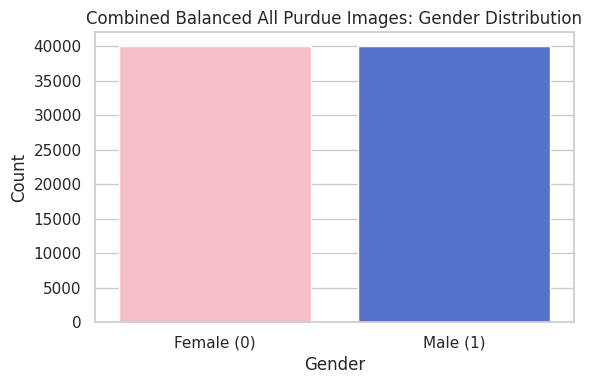

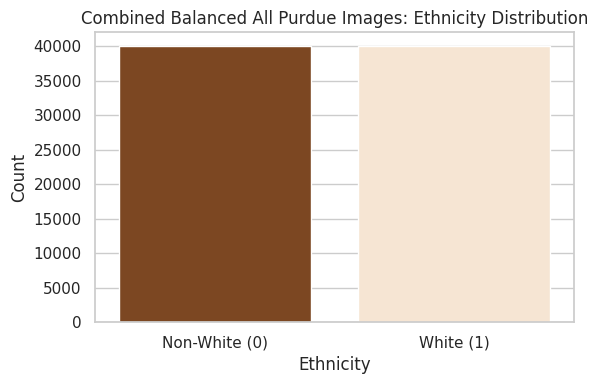

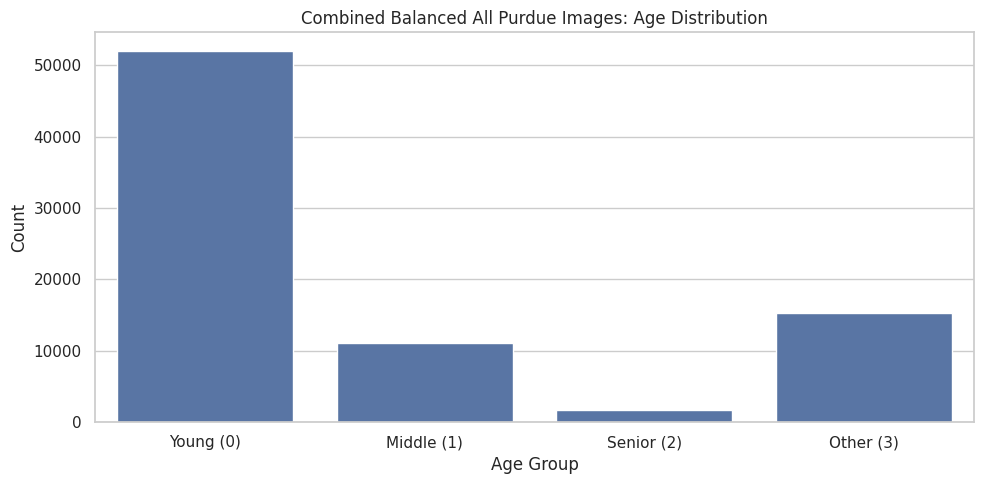

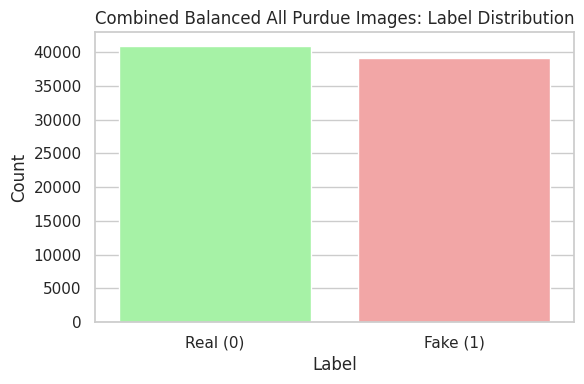

In [11]:
plot_distribution(purdue_df, dataset_name="Combined Balanced All Purdue Images")


#Extract Images from Tar File


In [12]:
tar_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/part1.tar"
extract_path = "/content/allpurdue_images"
os.makedirs(extract_path, exist_ok=True)

In [13]:
# Get list of all filenames from purdue_df
purdue_filenames = purdue_df["image_id"].tolist()
purdue_filenames = set(purdue_filenames)  # for fast lookup


In [14]:

# Open the tar file
with tarfile.open(tar_path) as tar:
    members = tar.getmembers()
    selected = [m for m in members if os.path.basename(m.name) in purdue_filenames]

    print(f"Total to extract: {len(selected)} images")

    batch = []
    extracted_count = 0

    for i, member in enumerate(selected, 1):
        filename = os.path.basename(member.name)
        dest_path = os.path.join(extract_path, filename)

        # Skip if already exists
        if os.path.exists(dest_path):
            continue

        batch.append(member)

        # Extract every 1000 images or at the end
        if len(batch) == 1000 or i == len(selected):
            tar.extractall(path=extract_path, members=batch)
            extracted_count += len(batch)
            print(f"Extracted {extracted_count}/{len(selected)} images...")
            batch = []

print(" Extraction complete!")


Total to extract: 582064 images
Extracted 1000/582064 images...
Extracted 2000/582064 images...
Extracted 3000/582064 images...
Extracted 4000/582064 images...
Extracted 5000/582064 images...
Extracted 6000/582064 images...
Extracted 7000/582064 images...
Extracted 8000/582064 images...
Extracted 9000/582064 images...
Extracted 10000/582064 images...
Extracted 11000/582064 images...
Extracted 12000/582064 images...
Extracted 13000/582064 images...
Extracted 14000/582064 images...
Extracted 15000/582064 images...
Extracted 16000/582064 images...
Extracted 17000/582064 images...
Extracted 18000/582064 images...
Extracted 19000/582064 images...
Extracted 20000/582064 images...
Extracted 21000/582064 images...
Extracted 22000/582064 images...
Extracted 23000/582064 images...
Extracted 24000/582064 images...
Extracted 25000/582064 images...
Extracted 26000/582064 images...
Extracted 27000/582064 images...
Extracted 28000/582064 images...
Extracted 29000/582064 images...
Extracted 30000/5820

In [15]:
with open("/content/allpurdue_images/extracted_purdue_log.txt", "w") as f:
    for fname in purdue_filenames:
        f.write(f"{fname}\n")

In [16]:

# Check how many images are in the folder
print("Total extracted files:", len(os.listdir("/content/allpurdue_images")))

# Preview a few file names
print("Sample files:", os.listdir("/content/allpurdue_images")[:5])

# preview a few sample paths to images in content/allpurdue_images
print("Sample paths:", [os.path.join("/content/allpurdue_images", fname) for fname in os.listdir("/content/allpurdue_images")[:5]])

Total extracted files: 2
Sample files: ['extracted_purdue_log.txt', 'part1']
Sample paths: ['/content/allpurdue_images/extracted_purdue_log.txt', '/content/allpurdue_images/part1']


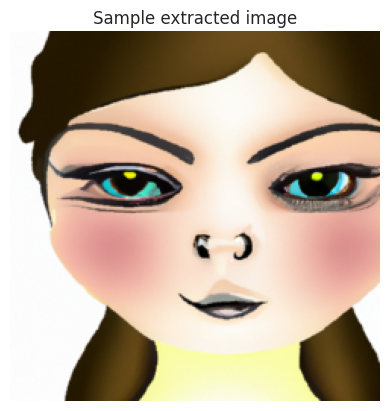

In [17]:
sample_path = "/content/allpurdue_images/part1/CommercialTools/dalle2/104_face3.png"  # change based on your filenames
img = Image.open(sample_path)

plt.imshow(img)
plt.axis("off")
plt.title("Sample extracted image")
plt.show()


In [18]:

# Step 1: Build image map again
root_dir = "/content/allpurdue_images/part1"
image_map = {}

for root, _, files in os.walk(root_dir):
    for file in files:
        image_map[file] = os.path.join(root, file)

# Step 2: Verify quickly that the map has images
print(f"Total images found: {len(image_map)}")

# Step 3: Re-apply path fixing
def resolve_image_path(row):
    filename = os.path.basename(row["image_path"])
    return image_map.get(filename, None)

tqdm.pandas()
purdue_df["image_path"] = purdue_df.progress_apply(resolve_image_path, axis=1)

# Step 4: Drop rows with missing paths
missing_paths = purdue_df[purdue_df["image_path"].isnull()]
print(f"Missing image paths: {len(missing_paths)}")

purdue_df = purdue_df.dropna(subset=["image_path"]).reset_index(drop=True)
print(f"Corrected dataset size: {len(purdue_df)}")

# Verify paths
print(purdue_df["image_path"].head())


Total images found: 51936


100%|██████████| 80000/80000 [00:00<00:00, 176759.22it/s]

Missing image paths: 12650
Corrected dataset size: 67350
0    /content/allpurdue_images/part1/DCFACe/8840/53...
1    /content/allpurdue_images/part1/DCFACe/8840/46...
2       /content/allpurdue_images/part1/FFHQ/11953.png
3    /content/allpurdue_images/part1/CelebA/170053.jpg
4    /content/allpurdue_images/part1/casia-webface/...
Name: image_path, dtype: object


In [19]:
purdue_df = purdue_df.dropna(subset=["image_path"]).reset_index(drop=True)
print(f"Final dataset size: {len(purdue_df)}")

Final dataset size: 67350


In [20]:
# Function to display value counts
def show_class_distribution(df, column_name):
    print(f"\n=== {column_name.upper()} Distribution ===")
    print(df[column_name].value_counts().sort_index())
    print(df[column_name].value_counts(normalize=True).sort_index().apply(lambda x: f"{x:.2%}"))

# Show distributions for key columns
show_class_distribution(purdue_df, "label")      # Real (1) vs Fake (0)
show_class_distribution(purdue_df, "gender")     # Female (0), Male (1)
show_class_distribution(purdue_df, "ethnicity")  # Non-White (0), White (1)
show_class_distribution(purdue_df, "age")        # Age buckets: 0=Young, 1=Middle, 2=Senior, 3=Other



=== LABEL Distribution ===
label
0    39436
1    27914
Name: count, dtype: int64
label
0    58.55%
1    41.45%
Name: proportion, dtype: object

=== GENDER Distribution ===
gender
0    33621
1    33729
Name: count, dtype: int64
gender
0    49.92%
1    50.08%
Name: proportion, dtype: object

=== ETHNICITY Distribution ===
ethnicity
0    33179
1    34171
Name: count, dtype: int64
ethnicity
0    49.26%
1    50.74%
Name: proportion, dtype: object

=== AGE Distribution ===
age
0    43777
1     9665
2     1262
3    12646
Name: count, dtype: int64
age
0    65.00%
1    14.35%
2     1.87%
3    18.78%
Name: proportion, dtype: object


In [21]:
#save purdue_df
combined_out_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/purdue_balanced.csv"
purdue_df.to_csv(combined_out_path, index=False)

# Reload
purdue_df = pd.read_csv(combined_out_path)
print(purdue_df["image_path"].head())


0    /content/allpurdue_images/part1/DCFACe/8840/53...
1    /content/allpurdue_images/part1/DCFACe/8840/46...
2       /content/allpurdue_images/part1/FFHQ/11953.png
3    /content/allpurdue_images/part1/CelebA/170053.jpg
4    /content/allpurdue_images/part1/casia-webface/...
Name: image_path, dtype: object


In [23]:
!pip install transformers --quiet

import os
import time
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor
from sklearn.model_selection import train_test_split


In [27]:

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class RealVsAIDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['image_path']
        label = self.data.iloc[idx]['label']
        gender = self.data.iloc[idx]['gender']
        ethnicity = self.data.iloc[idx]['ethnicity']

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label, gender, ethnicity

        # Open image
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"File not found: {img_path}")
            return None, label

        if self.transform:
            image = self.transform(image)

        return image, label



In [28]:
# Split
train_df, temp_df = train_test_split(purdue_df,
                                     test_size=0.3,
                                     stratify=purdue_df['label'],
                                     random_state=42)

val_df, test_df = train_test_split(temp_df,
                                   test_size=0.5,
                                   stratify=temp_df['label'],
                                   random_state=42)

# Create dataset instances
train_dataset = RealVsAIDataset(train_df, transform=transform)
val_dataset = RealVsAIDataset(val_df, transform=transform)
test_dataset = RealVsAIDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Save CSV files
train_df.to_csv('/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/train_data.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/val_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/test_data.csv', index=False)

# Check the distribution
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 47145
Validation size: 10102
Test size: 10103


In [ ]:
img, lbl = train_dataset[0]
if img is not None:
    print("Image loaded successfully:", img.shape)
else:
    print("Failed to load image.")


Image loaded successfully: torch.Size([3, 224, 224])


In [ ]:
# Model setup
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,
    ignore_mismatched_sizes=True
)
model.to("cuda")

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Evaluation function
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to("cuda"), labels.to("cuda")
            outputs = model(images).logits
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    return correct / total

# Training Loop
num_epochs = 5
total_start_time = time.time()

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    total_loss, correct = 0.0, 0

    for images, labels in train_loader:
        images = images.to("cuda")
        labels = labels.long().to("cuda")

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    train_accuracy = correct / len(train_dataset)
    val_accuracy = evaluate(model, val_loader)
    epoch_duration = time.time() - epoch_start_time

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Loss: {avg_loss:.4f} | "
          f"Train Acc: {train_accuracy:.4f} | "
          f"Val Acc: {val_accuracy:.4f} | "
          f"Time: {epoch_duration:.2f}s")

total_training_time = time.time() - total_start_time
print(f"\nTotal Training Time: {total_training_time:.2f}s ({total_training_time/60:.2f} mins)")

from sklearn.metrics import accuracy_score
import numpy as np

# Evaluate overall test accuracy
test_accuracy = evaluate(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/5] | Loss: 0.1962 | Train Acc: 0.9213 | Val Acc: 0.9352 | Time: 2111.72s
Epoch [2/5] | Loss: 0.0958 | Train Acc: 0.9638 | Val Acc: 0.9484 | Time: 2088.83s
Epoch [3/5] | Loss: 0.0460 | Train Acc: 0.9836 | Val Acc: 0.9582 | Time: 2058.50s
Epoch [4/5] | Loss: 0.0275 | Train Acc: 0.9903 | Val Acc: 0.9612 | Time: 2056.23s
Epoch [5/5] | Loss: 0.0202 | Train Acc: 0.9926 | Val Acc: 0.9573 | Time: 2054.32s

Total Training Time: 10369.60s (172.83 mins)
Test Accuracy: 0.9552


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_by_group(model, dataloader, group_name):
    model.eval()
    y_true, y_pred, groups = [], [], []

    with torch.no_grad():
        for images, labels, genders, ethnicities in dataloader:
            images = images.to("cuda")
            labels = labels.to("cuda")
            outputs = model(images).logits
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

            if group_name == "gender":
                groups.extend(genders)
            elif group_name == "ethnicity":
                groups.extend(ethnicities)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    groups = np.array(groups)



    group_acc = {}
    print(f"\nAccuracy by {group_name.capitalize()}:")
    for value in np.unique(groups):
        mask = groups == value
        acc = accuracy_score(y_true[mask], y_pred[mask])
        print(f"{group_name.capitalize()} {value}: {acc:.4f}")
        group_acc[value] = acc

    return group_acc

# Evaluate by gender
evaluate_by_group(model, test_loader, group_name="gender")

# Evaluate by ethnicity
evaluate_by_group(model, test_loader, group_name="ethnicity")



 Accuracy by Gender:
Gender 0: 0.9498
Gender 1: 0.9607

 Accuracy by Ethnicity:
Ethnicity 0: 0.9526
Ethnicity 1: 0.9576


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_by_group(model, dataloader, group_name):
    model.eval()
    y_true, y_pred, groups = [], [], []

    with torch.no_grad():
        for images, labels, genders, ethnicities in dataloader:
            images = images.to("cuda")
            labels = labels.to("cuda")
            outputs = model(images).logits
            predictions = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

            if group_name == "gender":
                groups.extend(genders)
            elif group_name == "ethnicity":
                groups.extend(ethnicities)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    groups = np.array(groups)

    group_acc = {}
    print(f"\nAccuracy by {group_name.capitalize()}:")
    for value in np.unique(groups):
        mask = groups == value
        acc = accuracy_score(y_true[mask], y_pred[mask])
        print(f"{group_name.capitalize()} {value}: {acc:.4f}")
        group_acc[value] = acc

    return group_acc


In [ ]:
# Save the trained model
model.save_pretrained("/content/drive/MyDrive/w210/Purdue_AI_Images/my_Purdue_trained_vit")

In [ ]:
import pickle

# Get model weights (state_dict)
model_weights = model.state_dict()

# Path to save pickle file
pkl_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/allpurdue_vit_model.pkl"

# Save with pickle
with open(pkl_path, "wb") as f:
    pickle.dump(model_weights, f)

print(f"Model weights saved to {pkl_path}")


Model weights saved to /content/drive/MyDrive/w210/Purdue_AI_Images/allpurdue_vit_model.pkl


In [24]:
# Load your fine-tuned ViT model
model = ViTForImageClassification.from_pretrained(
    "/content/drive/MyDrive/w210/Purdue_AI_Images/my_Purdue_trained_vit"
).to("cuda")

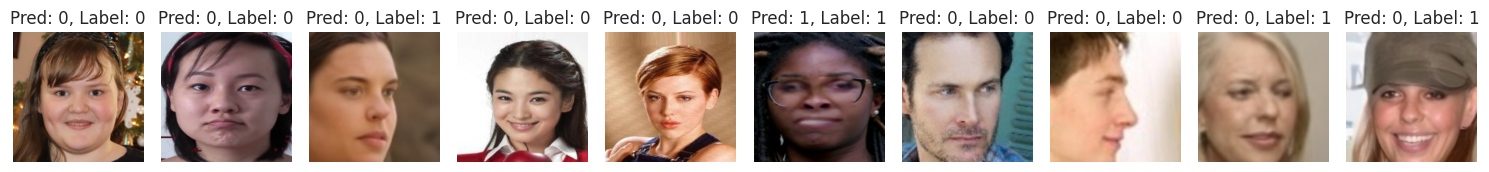

In [29]:
def visualize_predictions(model, dataloader, num_samples=5):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(15, 8))

    with torch.no_grad():
        for data in dataloader:

            images, labels = data[0], data[1]  # Unpack images and labels

            images_cuda = images.to("cuda")
            outputs = model(images_cuda).logits
            predictions = torch.argmax(outputs, dim=1)

            for i in range(images.size(0)):
                if images_shown >= num_samples:
                    break
                plt.subplot(1, num_samples, images_shown + 1)
                img = images[i].cpu().numpy().transpose((1, 2, 0))
                img = (img * 0.5) + 0.5  # unnormalize
                plt.imshow(img)
                plt.title(f"Pred: {predictions[i].item()}, Label: {labels[i].item()}")
                plt.axis('off')
                images_shown += 1

            if images_shown >= num_samples:
                break

    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(model, test_loader, num_samples=10)


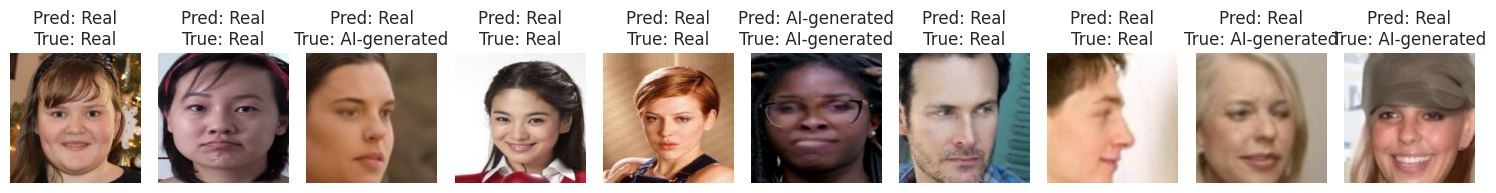

In [31]:
def visualize_predictions(model, dataloader, num_samples=5):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(15, 8))

    class_names = {0: "Real", 1: "AI-generated"}

    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0], data[1]

            images_cuda = images.to("cuda")
            outputs = model(images_cuda).logits
            predictions = torch.argmax(outputs, dim=1)

            for i in range(images.size(0)):
                if images_shown >= num_samples:
                    break
                plt.subplot(1, num_samples, images_shown + 1)
                img = images[i].cpu().numpy().transpose((1, 2, 0))
                img = (img * 0.5) + 0.5  # unnormalize
                plt.imshow(img)
                pred_label = class_names[predictions[i].item()]
                true_label = class_names[labels[i].item()]
                plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
                plt.axis('off')
                images_shown += 1

            if images_shown >= num_samples:
                break

    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(model, test_loader, num_samples=10)

In [ ]:
train_losses = [0.1962, 0.0958, 0.0460, 0.0275, 0.0202]
train_accuracies = [0.9213, 0.9638, 0.9836, 0.9903, 0.9926]
val_accuracies = [0.9352, 0.9484, 0.9582, 0.9612, 0.9573]
test_accuracy = 0.9552


In [ ]:
from transformers import ViTForImageClassification

# Load model from saved directory
model = ViTForImageClassification.from_pretrained(
    "/content/drive/MyDrive/w210/Purdue_AI_Images/my_Purdue_trained_vit"
).to("cuda")
model.eval()


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [ ]:
# Load test set
test_df = pd.read_csv("/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/test_data.csv")
test_dataset = RealVsAIDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import torch
import numpy as np

# Run evaluation on test set
def evaluate_test(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to("cuda")
            labels = labels.to("cuda")

            outputs = model(images).logits
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Run
y_pred, y_true = evaluate_test(model, test_loader)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Fake", "Real"]))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


ValueError: too many values to unpack (expected 2)

In [ ]:
output_df = test_df.copy()
output_df["prediction"] = y_pred
output_df.to_csv("/content/drive/MyDrive/w210/Purdue_AI_Images/test_predictions.csv", index=False)
print("Saved predictions to test_predictions.csv")


Saved predictions to test_predictions.csv


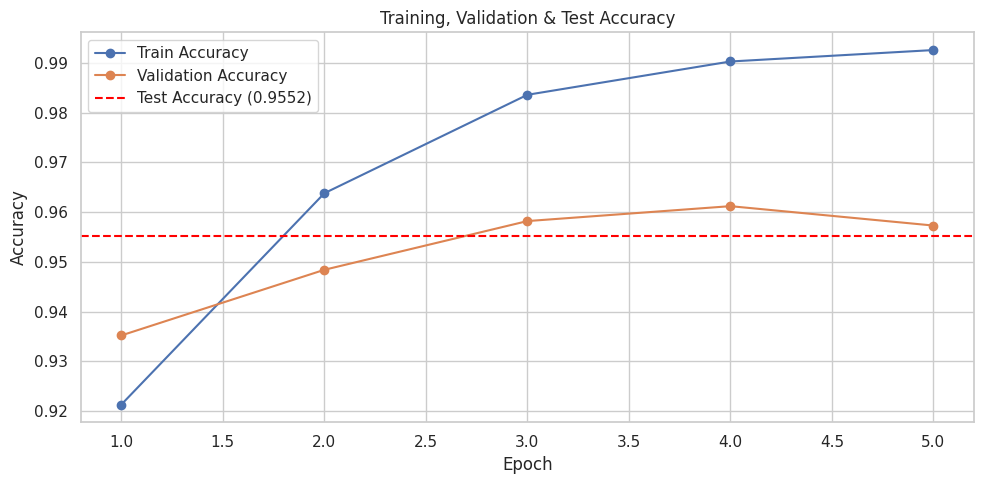

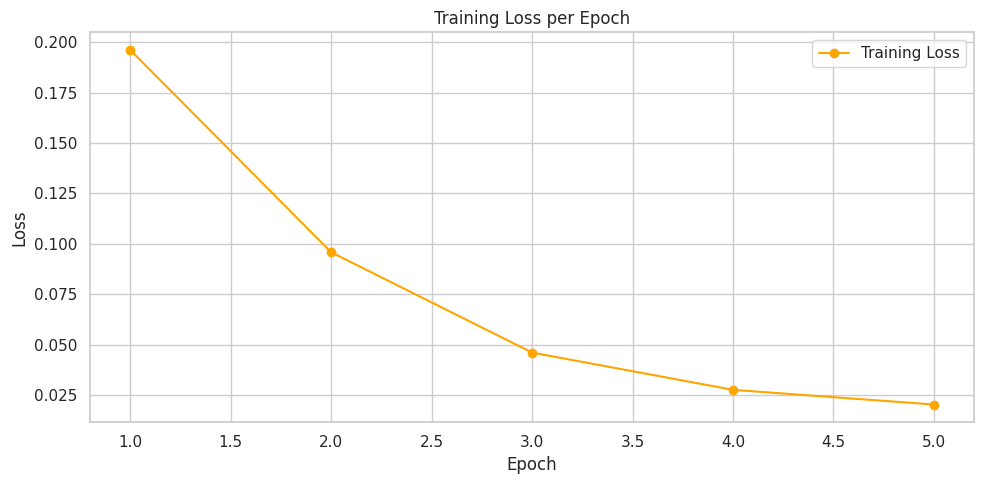

In [ ]:

epochs = list(range(1, 6))  # 5 epochs

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy ({test_accuracy:.4f})')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training, Validation & Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', color='orange', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 600x600 with 0 Axes>

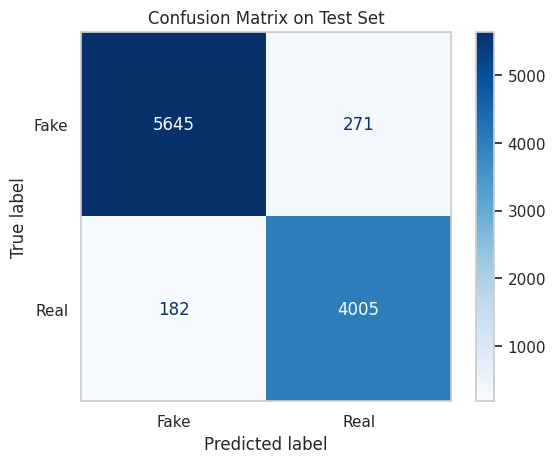

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()



In [ ]:
def plot_group_accuracy(group_acc, group_name, label_map=None):
    labels = [label_map.get(k, str(k)) if label_map else str(k) for k in group_acc.keys()]
    values = list(group_acc.values())

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color='lightcoral')
    plt.ylim(0.0, 1.0)
    plt.title(f"Accuracy by {group_name.capitalize()}")
    plt.xlabel(group_name.capitalize())
    plt.ylabel("Accuracy")
    plt.grid(axis='y')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_group_accuracy(group_acc, group_name, label_map=None):
    # Define colors for known groups
    if group_name == "gender":
        color_map = {0: "lightpink", 1: "royalblue"}  # Female, Male
    elif group_name == "ethnicity":
        color_map = {0: "saddlebrown", 1: "#fce5cd"}  # Non-white, White
    else:
        color_map = {}

    labels = [label_map.get(k, str(k)) if label_map else str(k) for k in group_acc.keys()]
    values = list(group_acc.values())
    colors = [color_map.get(k, "gray") for k in group_acc.keys()]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color=colors)
    plt.ylim(0.0, 1.0)
    plt.title(f"Accuracy by {group_name.capitalize()}")
    plt.xlabel(group_name.capitalize())
    plt.ylabel("Accuracy")
    plt.grid(axis='y')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [ ]:
#gender and ethnicity map
gender_label_map = {0: "Female", 1: "Male"}
ethnicity_label_map = {0: "Non-White", 1: "White"}



Accuracy by Gender:
Gender 0: 0.9498
Gender 1: 0.9607


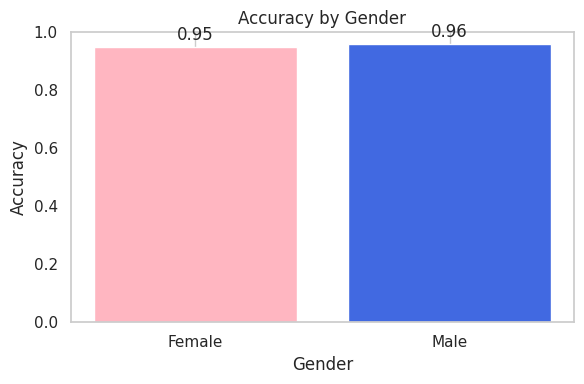


Accuracy by Ethnicity:
Ethnicity 0: 0.9526
Ethnicity 1: 0.9576


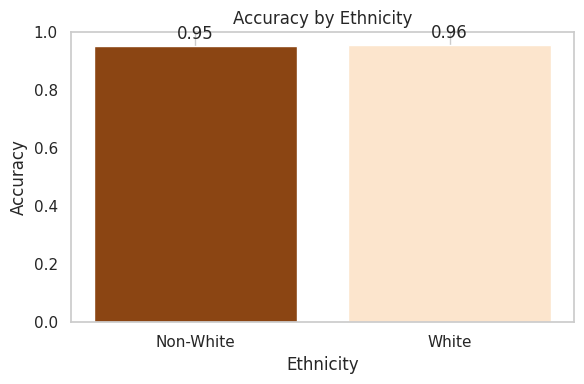

In [ ]:
# Accuracy by Gender
gender_acc = evaluate_by_group(model, test_loader, group_name="gender")
plot_group_accuracy(gender_acc, "gender", label_map=gender_label_map)

# Accuracy by Ethnicity
ethnicity_acc = evaluate_by_group(model, test_loader, group_name="ethnicity")
plot_group_accuracy(ethnicity_acc, "ethnicity", label_map=ethnicity_label_map)


In [ ]:
import os

folder_path = "/content/drive/MyDrive/w210/final_data/test_images/"
print("Contents of folder:")
print(os.listdir(folder_path))

Contents of folder:
['v3_0282525_360.jpg', 'images_fake_360.jpg', 'download_360.jpg']


In [78]:
#checking the performance of the model on unseen images

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/w210/Purdue_AI_Images/my_Purdue_trained_vit"
model = ViTForImageClassification.from_pretrained(model_path)
model.eval().to("cuda")

# Step 2: Load the feature extractor (normalizes image like during training)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

# Step 3: Define helper function for prediction
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    label = "Real (1)" if predicted_class == 0 else "Fake (0)"
    print(f"{os.path.basename(image_path)} → Prediction: {label}")

# Step 4: Run predictions
predict_image("/content/drive/MyDrive/w210/final_data/test_images/download_360.jpg")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/v3_0282525_360.jpg")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/images_fake_360.jpg")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/test2.png")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/IMG_5092.jpeg")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/IMG_0482.jpeg")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/test3.png")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/test4.png")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/test5.png")
predict_image("/content/drive/MyDrive/w210/final_data/test_images/test6.png")


download_360.jpg → Prediction: Real (1)
v3_0282525_360.jpg → Prediction: Real (1)
images_fake_360.jpg → Prediction: Fake (0)
test2.png → Prediction: Fake (0)
IMG_5092.jpeg → Prediction: Real (1)
IMG_0482.jpeg → Prediction: Real (1)
test3.png → Prediction: Real (1)
test4.png → Prediction: Real (1)
test5.png → Prediction: Real (1)
test6.png → Prediction: Real (1)


In [ ]:


# Load the list of images from the balanced dataset (80,000 images)
used_df = pd.read_csv("/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/purdue_balanced.csv")

# Drop rows with missing image paths
used_df = used_df.dropna(subset=["image_path"]).reset_index(drop=True)

# Get the list of image_paths used in the dataset (relative paths)
used_image_paths = set(used_df['image_path'].tolist())

# Paths to the directory containing extracted images
extracted_image_dir = "/content/allpurdue_images"

# Step 1: Get all image files from the extracted directory
all_images = []
for root, _, files in os.walk(extracted_image_dir):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            # Create relative path to compare with used_image_paths
            rel_path = os.path.relpath(os.path.join(root, file), extracted_image_dir)
            all_images.append(rel_path)

# Debugging: Check how many images were found
print(f"Found {len(all_images)} images in the directory.")

# Step 2: Filter out the images already used in the balanced dataset
unseen_images = [img for img in all_images if img not in used_image_paths]

# Debugging: Check how many unseen images are left
print(f"Found {len(unseen_images)} unseen images.")

# Step 3: Check the number of unseen images
if len(unseen_images) < 100:
    print(f"Only {len(unseen_images)} unseen images available.")
    selected_images = unseen_images  # Select all available unseen images
else:
    # Randomly select 100 unseen images
    selected_images = random.sample(unseen_images, 100)

# Step 4: Print or save the selected images
print("Selected images:")
for img in selected_images:
    print(img)

# Save the list of selected images to a CSV
selected_images_df = pd.DataFrame(selected_images, columns=["image_id"])
selected_images_df.to_csv("/content/drive/MyDrive/w210/Purdue_AI_Images/annotations/selected_unseen_images.csv", index=False)


Found 582064 images in the directory.
Found 582064 unseen images.
Selected images:
part1/DCFACe/9776/47.jpg
part1/DCFACe/593/36.jpg
part1/DCFACe/4444/32.jpg
part1/DCFACe/3033/40.jpg
part1/DCFACe/5248/47.jpg
part1/DCFACe/883/48.jpg
part1/DCFACe/9362/33.jpg
part1/DCFACe/8058/26.jpg
part1/casia-webface/007265/00380257.jpg
part1/DCFACe/2575/6.jpg
part1/DCFACe/1937/18.jpg
part1/DCFACe/8736/18.jpg
part1/DCFACe/7594/31.jpg
part1/DCFACe/36/15.jpg
part1/DCFACe/8135/42.jpg
part1/celebdf/crop_img/0_Celeb-synthesis_id52_id53_0008_241.png
part1/DCFACe/719/28.jpg
part1/DCFACe/8461/31.jpg
part1/DCFACe/7926/12.jpg
part1/DCFACe/5340/9.jpg
part1/DCFACe/1773/13.jpg
part1/DCFACe/4184/2.jpg
part1/DCFACe/656/35.jpg
part1/DCFACe/1679/14.jpg
part1/DCFACe/346/37.jpg
part1/DCFACe/646/52.jpg
part1/DCFACe/8539/10.jpg
part1/DCFACe/8828/13.jpg
part1/DCFACe/8856/51.jpg
part1/DCFACe/9231/11.jpg
part1/DCFACe/9544/47.jpg
part1/DCFACe/3457/41.jpg
part1/DCFACe/1433/14.jpg
part1/DCFACe/5840/1.jpg
part1/DCFACe/1365/53.jpg


In [ ]:
!cp -r /content/fake_images /content/drive/MyDrive/w210/